In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter as fsf
from plots.mpltoolkit import named_colors, mpl_loc, fancy_legend, load_mpl_presets
from astropy.cosmology import Planck13 as cosmo
from scipy.integrate import quad
import numpy as np
import random
import sys
sys.path.append("..")
from src.mzr import am2013
from src.smf import baldry12
from src.umachine_sfhs import relative_ia_rate
from src.umachine_sfhs import _MASSES_ as umachine_masses
load_mpl_presets()
print(sys.version_info)

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)


In [2]:
path = "../mocksamples"
filenames = [
    "baldry_500_m0p3_z0p2_gamma0.dat",
    "baldry_500_m0p3_z0p2_gamma0p2.dat",
    "baldry_500_m0p3_z0p2_gamma0p5.dat",
    "baldry_500_m0p3_z0p2_gamma1p0.dat",
    "baldry_500_m0p3_z0p2_gamma2p0.dat"
]
mocksamples = [np.genfromtxt("%s/%s" % (path, _)) for _ in filenames]

def mass_weighted_baldry(mass):
    return mass * baldry12(mass)

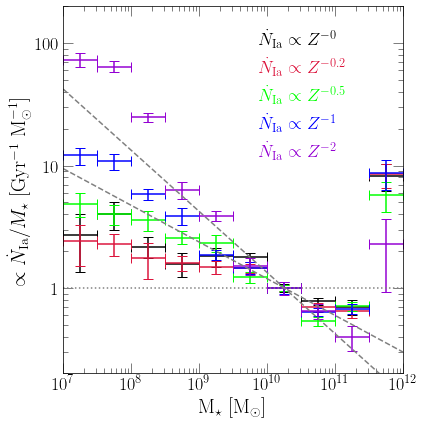

In [58]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.yaxis.set_major_formatter(fsf("%g"))
ax.set_xlabel(r"M$_\star$ [M$_\odot$]")
ax.set_ylabel(r"$\propto \dot{N}_\text{Ia} / M_\star$ [Gyr$^{-1}$ M$_\odot^{-1}$]")
ax.set_xlim([10**7, 10**12])
ax.set_ylim([0.2, 200])

nbins = 10
njack = 10
log_mstar_bins = np.linspace(7, 12, nbins + 1)
plaw_indeces = [0, 0.2, 0.5, 1, 2]
colors = ["black", "crimson", "lime", "blue", "darkviolet"]
idx = 0
while log_mstar_bins[idx] < 10: idx += 1
random.seed(a = 0)

for i in range(len(mocksamples)):
    log_mstar = [row[0] for row in mocksamples[i]]
    rates = nbins * [0]
    yerr = nbins * [0.]
    for j in range(len(rates)):
        arr = list(filter(lambda x: log_mstar_bins[j] <= x <= log_mstar_bins[j + 1], log_mstar))
        rates[j] = len(arr)
        jack_subs = [int(njack * _) for _ in np.random.random_sample(size = len(arr))]
        jack_rates = njack * [len(arr)]
        for k in range(len(arr)): jack_rates[jack_subs[k]] -= 1
        mean_jack_rate = np.mean(jack_rates)
        for k in range(njack): yerr[j] += (jack_rates[k] - mean_jack_rate)**2
        yerr[j] *= (njack - 1) / njack
        yerr[j] = np.sqrt(yerr[j])
        
        norm = quad(mass_weighted_baldry, 10**log_mstar_bins[j], 10**log_mstar_bins[j + 1])[0]
        rates[j] /= norm
        yerr[j] /= norm
        
    pre = 1 / rates[idx]
    rates = [pre * _ for _ in rates]
    yerr = [pre * _ for _ in yerr]

    xvals = [10**((a + b) / 2) for a, b in zip(log_mstar_bins[1:], log_mstar_bins[:-1])]
    xerr = [
        [a - 10**b for a, b in zip(xvals, log_mstar_bins[:-1])],
        [10**a - b for a, b in zip(log_mstar_bins[1:], xvals)]
    ]
    kwargs = {
        "yerr": yerr,
        "xerr": xerr,
        "color": named_colors()[colors[i]],
        "linestyle": "None"
    }
    ax.errorbar(xvals, rates, **kwargs)
    
    # dummy lines for drawing the legend
    kwargs = {
        "c": named_colors()[colors[i]],
        "label": r"$\dot{N}_\text{Ia} \propto Z^{-%g}$" % (plaw_indeces[i])
    }
    ax.plot([10, 20], [10, 20], **kwargs)
    
kwargs = {
    "loc": mpl_loc("upper right"),
    "handlelength": 0,
    "bbox_to_anchor": (0.88, 0.98)
}
leg = ax.legend(**kwargs)
fancy_legend(leg, colors)
for i in range(len(mocksamples)):
    leg.legendHandles[i].set_visible(False)
    
xvals = np.logspace(7, 12, 100)
yvals = [(_ / 10**((log_mstar_bins[idx] + log_mstar_bins[idx + 1]) / 2))**-0.5 for _ in xvals]
kwargs = {
    "c": named_colors()["grey"],
    "linestyle": '--'
}
ax.plot(xvals, yvals, **kwargs)
yvals = [(_ / 10**((log_mstar_bins[idx] + log_mstar_bins[idx + 1]) / 2))**-0.3 for _ in xvals]
ax.plot(xvals, yvals, **kwargs)
ax.axhline(1, c = named_colors()["grey"], linestyle = ':')

plt.tight_layout()
plt.show()

In [3]:
print(mocksamples)

[array([[ 8.973,  0.3  , -2.303,  0.2  ],
       [11.46 ,  0.3  , -2.748,  0.2  ],
       [10.78 ,  0.3  , -2.934,  0.2  ],
       ...,
       [11.37 ,  0.3  , -2.523,  0.2  ],
       [10.61 ,  0.3  , -1.604,  0.2  ],
       [10.8  ,  0.3  , -1.81 ,  0.2  ]]), array([[ 8.577,  0.3  , -2.504,  0.2  ],
       [10.66 ,  0.3  , -2.853,  0.2  ],
       [10.77 ,  0.3  , -2.773,  0.2  ],
       ...,
       [ 8.161,  0.3  , -3.149,  0.2  ],
       [10.93 ,  0.3  , -1.861,  0.2  ],
       [10.24 ,  0.3  , -1.829,  0.2  ]]), array([[ 8.737,  0.3  , -2.481,  0.2  ],
       [10.56 ,  0.3  , -2.866,  0.2  ],
       [ 7.651,  0.3  , -2.676,  0.2  ],
       ...,
       [10.38 ,  0.3  , -2.55 ,  0.2  ],
       [ 9.663,  0.3  , -1.991,  0.2  ],
       [10.24 ,  0.3  , -1.911,  0.2  ]]), array([[10.35 ,  0.3  , -2.202,  0.2  ],
       [ 8.204,  0.3  , -2.68 ,  0.2  ],
       [ 8.577,  0.3  , -3.046,  0.2  ],
       ...,
       [ 9.984,  0.3  , -3.176,  0.2  ],
       [10.07 ,  0.3  , -1.896,  0.2  ],
  

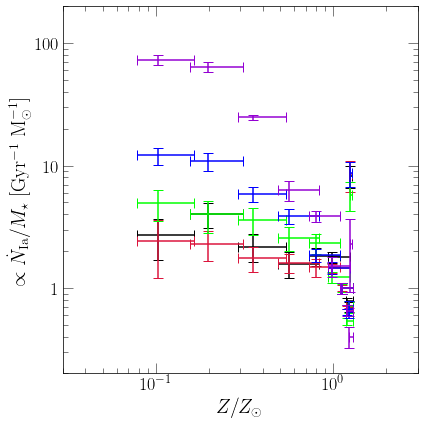

In [38]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.yaxis.set_major_formatter(fsf("%g"))
# ax.set_xlabel(r"M$_\star$ [M$_\odot$]")
ax.set_xlabel(r"$Z / Z_\odot$")
ax.set_ylabel(r"$\propto \dot{N}_\text{Ia} / M_\star$ [Gyr$^{-1}$ M$_\odot^{-1}$]")
# ax.set_xlim([10**7, 10**12])
ax.set_xlim([0.03, 3])
ax.set_ylim([0.2, 200])

nbins = 10
njack = 10
log_mstar_bins = np.linspace(7, 12, nbins + 1)
plaw_indeces = [0, 0.2, 0.5, 1, 2]
colors = ["black", "crimson", "lime", "blue", "darkviolet"]
idx = 0
while log_mstar_bins[idx] < 10: idx += 1
random.seed(a = 0)

for i in range(len(mocksamples)):
    log_mstar = [row[0] for row in mocksamples[i]]
    rates = nbins * [0]
    yerr = nbins * [0.]
    for j in range(len(rates)):
        arr = list(filter(lambda x: log_mstar_bins[j] <= x <= log_mstar_bins[j + 1], log_mstar))
        rates[j] = len(arr)
        jack_subs = [int(njack * _) for _ in np.random.random_sample(size = len(arr))]
        jack_rates = njack * [len(arr)]
        for k in range(len(arr)): jack_rates[jack_subs[k]] -= 1
        mean_jack_rate = np.mean(jack_rates)
        for k in range(njack): yerr[j] += (jack_rates[k] - mean_jack_rate)**2
        yerr[j] *= (njack - 1) / njack
        yerr[j] = np.sqrt(yerr[j])
        
        norm = quad(mass_weighted_baldry, 10**log_mstar_bins[j], 10**log_mstar_bins[j + 1])[0]
        rates[j] /= norm
        yerr[j] /= norm
        
    pre = 1 / rates[idx]
    rates = [pre * _ for _ in rates]
    yerr = [pre * _ for _ in yerr]

    xvals = [10**((a + b) / 2) for a, b in zip(log_mstar_bins[1:], log_mstar_bins[:-1])]
    xerr = [
        [a - 10**b for a, b in zip(xvals, log_mstar_bins[:-1])],
        [10**a - b for a, b in zip(log_mstar_bins[1:], xvals)]
    ]
    for j in range(len(xvals)):
#         print(am2013(xvals[j]))
        z = 10**am2013(xvals[j])
        z_top = 10**(am2013(xvals[j] + xerr[0][j]))
        z_bottom = 10**(am2013(xvals[j] - xerr[1][j]))
        xvals[j] = z
        xerr[0][j] = z_top - z
        xerr[1][j] = z - z_bottom
#         print(z)
#         xerr[0][j] = am2013(xvals[j]) - am2013(xvals[j] - xerr[0][j])
#         xerr[1][j] = am2013(xvals[j] - xerr[1][j]) - am2013(xvals[j])
#         xvals[j] = am2013(xvals[j])
    kwargs = {
        "yerr": yerr,
        "xerr": xerr,
        "color": named_colors()[colors[i]],
        "linestyle": "None"
    }
    ax.errorbar(xvals, rates, **kwargs)
    
    # dummy lines for drawing the legend
#     kwargs = {
#         "c": named_colors()[colors[i]],
#         "label": r"$\dot{N}_\text{Ia} \propto Z^{-%g}$" % (plaw_indeces[i])
#     }
#     ax.plot([10, 20], [10, 20], **kwargs)
    
# kwargs = {
#     "loc": mpl_loc("upper right"),
#     "handlelength": 0,
#     "bbox_to_anchor": (0.88, 0.98)
# }
# leg = ax.legend(**kwargs)
# fancy_legend(leg, colors)
# for i in range(len(mocksamples)):
#     leg.legendHandles[i].set_visible(False)
    
# xvals = np.logspace(7, 12, 100)
# yvals = [(_ / 10**((log_mstar_bins[idx] + log_mstar_bins[idx + 1]) / 2))**-0.5 for _ in xvals]
# kwargs = {
#     "c": named_colors()["grey"],
#     "linestyle": '--'
# }
# ax.plot(xvals, yvals, **kwargs)
# yvals = [(_ / 10**((log_mstar_bins[idx] + log_mstar_bins[idx + 1]) / 2))**-0.3 for _ in xvals]
# ax.plot(xvals, yvals, **kwargs)
# ax.axhline(1, c = named_colors()["grey"], linestyle = ':')

plt.tight_layout()
plt.show()

# The Galaxy Metallicity Function

In order to provide the proper weights to the Ia rate as a function of metallicity, we need the galaxy metallicity function. This can be obtained by combining the galaxy stellar mass function and the mass-metallicity relation. The galaxy stellar mass function, taken from Baldry et al. (2012):

$$
\frac{\partial n}{\partial M} = e^{-M / M^\star}
\left[\phi_1^\star \left(\frac{M}{M^\star}\right)^{\alpha_1} +
\phi_2^\star \left(\frac{M}{M^\star}\right)^{\alpha_2}\right]
$$

And the mass-metallicity relation, parameterized by Andrews & Martini (2013):

$$
12 + \log_{10}(\text{O/H}) = 12 + \log_{10}(\text{O/H})_\text{asm} -
\log_{10} \left(1 + \left(\frac{M_\text{TO}}{M}\right)^\gamma\right)
$$

Substituting $Z$ for (O/H) and inverting this to a function of mass produces the following expressions:

$$
\begin{aligned}
Z &= Z_\text{asm}\left(1 + \left(\frac{M_\text{TO}}{M}\right)^\gamma\right)^{-1}
\\
M &= M_\text{TO}\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma}
\end{aligned}
$$

Taking the derivative with respect to~$Z$ yields:

$$
\begin{aligned}
\frac{\partial M}{\partial Z} &= M_\text{TO}\left(\frac{-1}{\gamma}\right)
\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma - 1}
\left(\frac{-Z_\text{asm}}{Z^2}\right)
\\
&= \frac{M_\text{TO}}{\gamma}
\left(\frac{Z_\text{asm}}{Z^2}\right)
\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma - 1}
\end{aligned}
$$

Combining this with the galaxy stellar mass function yields the galaxy metallicity function:

$$
\begin{aligned}
\frac{\partial n}{\partial Z} &= \frac{\partial n}{\partial M} \frac{\partial M}{\partial Z}
\\
&= e^{-M / M^\star}
\left[\phi_1^\star \left(\frac{M}{M^\star}\right)^{\alpha_1} +
\phi_2^\star \left(\frac{M}{M^\star}\right)^{\alpha_2}\right]
\frac{M_\text{TO}}{\gamma}
\left(\frac{Z_\text{asm}}{Z^2}\right)
\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma - 1}
\\
&= \exp\left(\frac{-M_\text{TO}}{M^\star}\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma}\right)
\left[
\phi_1^\star 
\left(\frac{M_\text{TO}}{M^\star}\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma}\right)^{\alpha_1} +
\phi_2^\star 
\left(\frac{M_\text{TO}}{M^\star}\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma}\right)^{\alpha_2}
\right]
\frac{M_\text{TO}}{\gamma}
\left(\frac{Z_\text{asm}}{Z^2}\right)
\left(\frac{Z_\text{asm}}{Z} - 1\right)^{-1/\gamma - 1}
\end{aligned}
$$

Although we substitued the metallicity by mass $Z$ in for the number fraction (O/H), the mass ratio between oxygen and hydrogen nuclei would cancel in $Z / Z_\text{asm}$ anyway.
This function is complicated, but it luckily did not take much difficulty to derive.

In detail, we should convolve this with a gaussian of width $\sim$0.2 dex to take into account the intrinsic scatter in the mass-metallicity relation. As currently written, there will be no galaxies above the asymptotic metallicity.
This gives rise to the following functional form:

$$
f(Z) = \int_0^\infty \frac{\partial n}{\partial Z'}\Big|_{Z = Z'} G(\log_{10}(Z - Z')) dZ'
$$

where $G$ is a gaussian centered on zero with width $\sigma = 0.2$ and $\partial n / \partial Z$ is the galactic metallicity distribution derived above which does not incorporate scatter.

**Note**: Because Andrews & Martini (2013) measured the *oxygen* abundance, the values of $Z$ in the above equations should therefore be appropriate for $Z_O$, as opposed to some total $Z$.

In [20]:
def galactic_metallicity_distribution_noscatter(z, logmto = 8.901, logmstar = 10.66,
    gamma = 0.640, alpha1 = -0.35, alpha2 = -1.47, logplus12oh_asm = 8.798,
    phi1star = 0.00396, phi2star = 0.00079):
    r"""
    The galactic metallicity distribution, derived by taking the stellar mass
    function from Baldry et al. (2012) and the mass-metallicity relation
    parameterized by Andrews & Martini (2013).
    """
    mto = 10**logmto
    mstar = 10**10.66
    z_asm = 15.999 / 1.008 * 1e-12 * 10**logplus12oh_asm
    mto_on_mstar = mto / mstar
    z_asm_on_z = z_asm / z
    exponential = np.exp(-mto_on_mstar * (z_asm_on_z - 1)**(-1 / gamma))
    phi1 = phi1star * (mto_on_mstar * (z_asm_on_z - 1)**(-1 / gamma))**alpha1
    phi2 = phi2star * (mto_on_mstar * (z_asm_on_z - 1)**(-1 / gamma))**alpha2
    dmdz = mto / gamma * z_asm_on_z / z * (z_asm_on_z - 1)**(-1 / gamma - 1)
    return exponential * (phi1 + phi2) * dmdz

def mzr_scatter(dz, z):
    dlogz = dz / (z * np.log(10))
    return 1 / (0.2 * np.sqrt(2 * np.pi)) * np.exp(-dlogz**2 / (2 * 0.2**2))

def gmd_integrand(zprime, z):
    return galactic_metallicity_distribution_noscatter(zprime) * mzr_scatter(z - zprime, z)

def gmd(z):
    return quad(gmd_integrand, 0, 0.1, args = (z))[0]

/Users/astrobeard/anaconda3/envs/py3.10/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_67775/173701115.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(gmd_integrand, 0, 0.1, args = (z))[0]


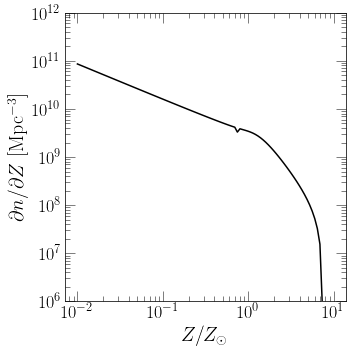

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel(r"$Z / Z_\odot$")
ax.set_ylabel(r"$\partial n / \partial Z$ [Mpc$^{-3}$]")
ax.set_ylim([1e6, 1e12])

xvals = np.logspace(-2, 0.99, 100)
# yvals = [galactic_metallicity_distribution_noscatter(0.00572 * _) for _ in xvals]
# ax.plot(xvals, yvals, c = named_colors()["red"])
yvals = [gmd(0.00572 * _) for _ in xvals]
ax.plot(xvals, yvals, c = named_colors()["black"])

plt.tight_layout()
plt.show()

/Users/astrobeard/anaconda3/envs/py3.10/lib/python3.10/site-packages/scipy/integrate/_quadpack_py.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_67775/173701115.py:28: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  return quad(gmd_integrand, 0, 0.1, args = (z))[0]
/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_67775/998462490.py:33: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be u

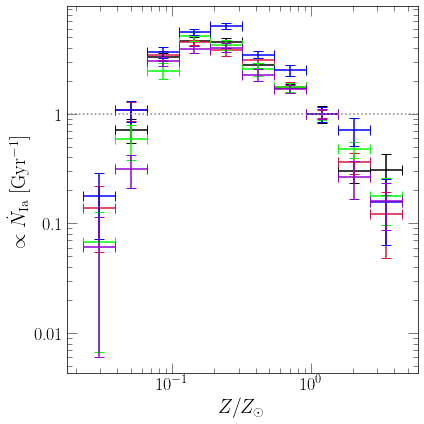

In [30]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111)
ax.set_xscale("log")
ax.set_yscale("log")
ax.yaxis.set_major_formatter(fsf("%g"))
ax.set_xlabel(r"$Z / Z_\odot$")
ax.set_ylabel(r"$\propto \dot{N}_\text{Ia}$ [Gyr$^{-1}$]")

nbins = 10
njack = 10
log_z_bins = np.linspace(-3.5, -1.2, nbins + 1)
plaw_indeces = [0, 0.2, 0.5, 1, 2]
colors = ["black", "crimson", "lime", "blue", "darkviolet"]
idx = 0
while log_z_bins[idx] < -2: idx += 1
random.seed(a = 0)

for i in range(len(mocksamples)):
    log_z = [row[2] for row in mocksamples[i]]
    rates = nbins * [0]
    yerr = nbins * [0.]
    for j in range(len(rates)):
        arr = list(filter(lambda x: log_z_bins[j] <= x <= log_z_bins[j + 1], log_z))
        rates[j] = len(arr)
        jack_subs = [int(njack * _) for _ in np.random.random_sample(size = len(arr))]
        jack_rates = njack * [len(arr)]
        for k in range(len(arr)): jack_rates[jack_subs[k]] -= 1
        mean_jack_rate = np.mean(jack_rates)
        for k in range(njack): yerr[j] += (jack_rates[k] - mean_jack_rate)**2
        yerr[j] *= (njack - 1) / njack
        yerr[j] = np.sqrt(yerr[j])
        
        norm = quad(gmd, 0.00572 / 0.014 * 10**log_z_bins[j], 0.00572 / 0.014 * 10**log_z_bins[j + 1])[0]
        if norm > 0:
            rates[j] /= norm
            yerr[j] /= norm
        else:
            rates[j] = float("nan")
            yerr[j] = float("nan")
        
    pre = 1 / rates[idx]
    rates = [pre * _ for _ in rates]
    yerr = [pre * _ for _ in yerr]

    xvals = [10**((a + b) / 2) / 0.014 for a, b in zip(log_z_bins[1:], log_z_bins[:-1])]
    xerr = [
        [a - 10**b / 0.014 for a, b in zip(xvals, log_z_bins[:-1])],
        [10**a / 0.014 - b for a, b in zip(log_z_bins[1:], xvals)]
    ]
    kwargs = {
        "yerr": yerr,
        "xerr": xerr,
        "color": named_colors()[colors[i]],
        "linestyle": "None"
    }
#     print(xvals)
#     print(rates)
#     print(xerr)
#     print("=========")
    ax.errorbar(xvals, rates, **kwargs)
    
#     # dummy lines for drawing the legend
#     kwargs = {
#         "c": named_colors()[colors[i]],
#         "label": r"$\dot{N}_\text{Ia} \propto Z^{-%g}$" % (plaw_indeces[i])
#     }
#     ax.plot([10, 20], [10, 20], **kwargs)
    
# kwargs = {
#     "loc": mpl_loc("upper right"),
#     "handlelength": 0,
#     "bbox_to_anchor": (0.88, 0.98)
# }
# leg = ax.legend(**kwargs)
# fancy_legend(leg, colors)
# for i in range(len(mocksamples)):
#     leg.legendHandles[i].set_visible(False)
    
# xvals = np.logspace(7, 12, 100)
# yvals = [(_ / 10**((log_z_bins[idx] + log_z_bins[idx + 1]) / 2))**-0.5 for _ in xvals]
# kwargs = {
#     "c": named_colors()["grey"],
#     "linestyle": '--'
# }
# ax.plot(xvals, yvals, **kwargs)
# yvals = [(_ / 10**((log_z_bins[idx] + log_z_bins[idx + 1]) / 2))**-0.3 for _ in xvals]
# ax.plot(xvals, yvals, **kwargs)
ax.axhline(1, c = named_colors()["grey"], linestyle = ':')

plt.tight_layout()
plt.show()